Regresion Lineal Múltiple




Este notebook tiene dos objetivos:
1. Ilustrar algunos aspectos que son útiles para ejecutar el paso de análisis exploratorio de los datos (Exploratory Data Analysis).
2. Ilustrar aspectos que tienen que ver con la limpieza de datos

Iniciemos importando las librerías que vamos a usar en el ejercicio.

In [46]:
### Librería de cálculo numérico
import numpy as np
### Libreria para manipulación de datasets  
import pandas as pd

In [47]:
from google.colab import files

Ruta donde se encuentra el dataset


In [48]:
#### Cargar archivo de datos original "USA_cars_datasets.xlsx"
uploaded = files.upload()
import io

Saving USA_cars_datasets.xlsx to USA_cars_datasets (1).xlsx


In [49]:
### Cargar los datos originales
### por favor buscar el archivo DataSetAutos.xlsx donde lo hayas descargado 
dfDatosOriginales = pd.read_excel(io.BytesIO(uploaded['USA_cars_datasets.xlsx']))

In [50]:
### Para observar los primeros registros del dataset
dfDatosOriginales.head(10)

brand    model  year  ... country      condition  price
0     toyota  cruiser  2008  ...     usa   10 days left   6300
1       ford       se  2011  ...     usa    6 days left   2899
2      dodge      mpv  2018  ...     usa    2 days left   5350
3       ford     door  2014  ...     usa  22 hours left  25000
4  chevrolet     1500  2018  ...     usa  22 hours left  27700
5      dodge      mpv  2018  ...     usa    2 days left   5700
6  chevrolet       pk  2010  ...     usa  22 hours left   7300
7        gmc     door  2017  ...     usa  20 hours left  13350
8  chevrolet   malibu  2018  ...     usa  22 hours left  14600
9       ford      mpv  2017  ...     usa    2 days left   5250

[10 rows x 12 columns]

In [51]:
dfDatosOriginales.tail(10)

brand   model  year  ... country      condition  price
2489  nissan   rogue  2018  ...     usa  21 hours left  13900
2490  nissan  sentra  2019  ...     usa    1 days left  10400
2491  nissan   versa  2018  ...     usa  21 hours left   9200
2492  nissan   versa  2019  ...     usa    1 days left   7400
2493  nissan   versa  2018  ...     usa  21 hours left   9200
2494  nissan   versa  2019  ...     usa    1 days left   7800
2495  nissan   versa  2018  ...     usa  21 hours left   9200
2496  nissan   versa  2018  ...     usa  21 hours left   9200
2497  nissan   versa  2018  ...     usa    2 days left   9200
2498  nissan   versa  2018  ...     usa  21 hours left   9200

[10 rows x 12 columns]

In [52]:
### Shape del dataframe original
dfDatosOriginales.shape

(2499, 12)

Una vez se cargan los datos se efectúa el análisis exploratorio, la limpieza de datos, la conversión a variables dummies para las variables categóricas y la normalización de los atributos.
Esos temas los vimos en la sesión pasada por lo que pasaremos a trabajar con el dataset luego de aplicar los pasos citados.
el notebook completo con el preprocesamiento se encuentra en linear-regression-model-to-determine-car-price.ipynb
el cual se los compartiremo en un momento.la explicación de cada atributo

In [53]:
### Cargar Archivo procesado USCarsDatasetPreprocesado.xlsx
uploadedFile = files.upload()
import io

Saving USCarsDatasetPreprocesado.xlsx to USCarsDatasetPreprocesado (1).xlsx


In [54]:
### Una vez se cargan los datos se efectua el analisis exploratorio, la limpieza de datos, la conversión a variables dummies para las variables categóricas y la normañización de los atriobutos
### Esos temas los vimos en la sesión pasada por lo que pasaremos a trabajar con el dataset luego de aplicar los pasos citados
### el notebook completo con el preprocesamiento se encuentra en linear-regression-model-to-determine-car-price.ipynb
### el cual se los compartiremo en un momento.

In [55]:
### por favor buscar el archivo DataSetAutos.xlsx donde lo hayas descargado 
cars_dataset = pd.read_excel(io.BytesIO(uploadedFile['USCarsDatasetPreprocesado.xlsx']))


In [56]:
### Mostrar las dimensiones del dataframe
### Notemos que 
cars_dataset.shape

(2435, 109)

In [57]:
### Describir el dataset
cars_dataset.describe()

index         year  ...  country_ usa         price
count  2435.000000  2435.000000  ...   2435.000000   2435.000000
mean   1248.235318     4.050103  ...      0.997125  17796.126078
std     724.423419     2.383686  ...      0.053551  10611.469120
min       0.000000     1.000000  ...      0.000000      0.000000
25%     621.500000     2.000000  ...      1.000000   9950.000000
50%    1236.000000     3.000000  ...      1.000000  16500.000000
75%    1877.500000     5.000000  ...      1.000000  25000.000000
max    2498.000000    10.000000  ...      1.000000  48500.000000

[8 rows x 109 columns]

In [58]:
cars_dataset.head()

index  year  mileage  ...  state_wisconsin  country_ usa  price
0      0    10   126482  ...                0             1   6300
1      1    10   126482  ...                0             1   2899
2      2     3    39590  ...                0             1   5350
3      3     7    64146  ...                0             1  25000
4      4     3     6654  ...                0             1  27700

[5 rows x 109 columns]

In [59]:
### Eliminar el atributo index
cars_dataset = cars_dataset.drop(["index"],axis=1)

Regresion Lineal

In [60]:
### Usar la regresion lineal sin validacion cruzada
features =["year",
"mileage",
"condition",
"brand_buick",
"brand_cadillac",
"brand_chevrolet",
"brand_ford",
"brand_heartland",
"brand_hyundai",
"brand_infiniti",
"brand_jaguar",
"brand_land",
"brand_maserati",
"brand_nissan",
"model_1500",
"model_2500",
"model_2500hd",
"model_3500",
"model_altima",
"model_armada",
"model_caravan",
"model_challenger",
"model_chassis",
"model_corvette",
"model_coupe",
"model_cruze",
"model_cutaway",
"model_dart",
"model_discovery",
"model_door",
"model_doors",
"model_drw",
"model_durango",
"model_ecosport",
"model_el",
"model_energi",
"model_equinox",
"model_escape",
"model_expedition",
"model_explorer",
"model_f-150",
"model_f-650",
"model_fiesta",
"model_focus",
"model_fusion",
"model_gle",
"model_hybrid",
"model_impala",
"model_journey",
"model_malibu",
"model_max",
"model_mpv",
"model_nautilus",
"model_note",
"model_pk",
"model_sedan",
"model_sentra",
"model_series",
"model_sonic",
"model_spark",
"model_sport",
"model_srw",
"model_suburban",
"model_tahoe",
"model_taurus",
"model_titan",
"model_trax",
"model_van",
"model_vehicl",
"model_versa",
"model_xd",
"title_status_clean vehicle",
"title_status_salvage insurance",
"color_black",
"color_blue",
"color_charcoal",
"color_competition orange",
"color_gray",
"color_kona blue metallic",
"color_maroon",
"color_no_color",
"color_off-white",
"color_orange",
"color_red",
"color_ruby red metallic tinted clearcoat",
"color_silver",
"color_white",
"state_alabama",
"state_arkansas",
"state_california",
"state_florida",
"state_georgia",
"state_indiana",
"state_kentucky",
"state_michigan",
"state_mississippi",
"state_missouri",
"state_nevada",
"state_new jersey",
"state_north carolina",
"state_oklahoma",
"state_ontario",
"state_oregon",
"state_pennsylvania",
"state_texas",
"state_wisconsin",
"country_ usa"]


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_trainLR, x_testLR, y_trainLR, y_testLR = train_test_split(X, y, test_size=0.15, random_state=1)
print("number of test samples :", x_testLR.shape[0])
print("number of training samples:",x_trainLR.shape[0])

number of test samples : 366
number of training samples: 2069


In [63]:
### Instanciar el objeto de RegresionLineal
lm = LinearRegression()

In [64]:
### Entrenar el modelo
lm.fit(x_trainLR,y_trainLR)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
### Valor de R_2:
lm.score(X, y)

0.7279208906433556

In [65]:
### Prediccion
y_predLR = pd.Series(lm.predict(x_testLR))

In [66]:
### Asignar o a los valores inferiores a cero
y_predLR[y_predLR<0]=0


In [67]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testLR, y_predLR))  
print('Mean Squared Error:', metrics.mean_squared_error(y_testLR, y_predLR))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testLR, y_predLR)))
print("R_2 = {:.2f} %".format((r2_score(y_testLR, y_predLR)*100)))

Mean Absolute Error: 4254.274824932733
Mean Squared Error: 38952344.70521477
Root Mean Squared Error: 6241.181354937122
R_2 = 65.10 %


Ahora usaremos Ridge Regression (con Cross Validation) para entrenar el modelo. 
La función RidgeCV se encarga del ajuste de hiperparámetros.
Tomamos una relación de prueba de tren de 75-25. Después de entrenar el modelo, calculamos varias medidas de precisión, con R-cuadrado igua a 73%

Best alpha = 1.0
Mean Absolute Error: 3832.082078081376
Mean Squared Error: 29088765.669572644
Root Mean Squared Error: 5393.400195569827
R_2 = 73.94 %


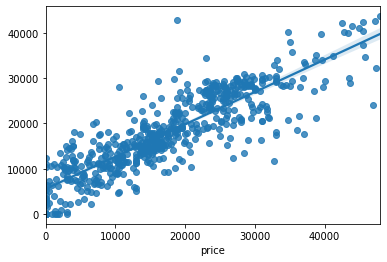

In [68]:
import sklearn

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, RidgeCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.feature_selection import chi2
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

########### Training the model ##############

X = cars_dataset.drop("price",axis=1)
y = cars_dataset["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

regressor = RidgeCV(alphas=[0.0001,0.001,0.01,0.1,1,1e1,1e2,1e3,1e4,1e5,1e6], store_cv_values=True)
regressor.fit(X_train, y_train)
cv_mse = np.mean(regressor.cv_values_, axis=0)
#print([0.0001,0.001,0.01,0.1,1,1e1,1e2,1e3,1e4,1e5,1e6])
#print(cv_mse)

# Best alpha
print("Best alpha = " + str(regressor.alpha_))

y_pred = pd.Series(regressor.predict(X_test))

y_pred[y_pred<0]=0

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R_2 = {:.2f} %".format((r2_score(y_test, y_pred)*100)))


#print('10% of Mean Price:', cars_dataset['price'].mean() * 0.1)

sns.regplot(y_test,y_pred)
plt.show()

Fuente de Información:
https://www.kaggle.com/abhijeetgupta23/linear-regression-model-to-determine-car-price
